# **Experiment-7: Demonstrate the working of Logistic Regression. Use an appropriate dataset and evaluate the results.**

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (10, 6)
print("All libraries imported successfully!")

All libraries imported successfully!


In [ ]:
# Load the Mobile Price Classification dataset
print("Loading Mobile Price Classification dataset...")
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

print(f"Train dataset loaded successfully! Shape: {train_data.shape}")
print(f"Test dataset loaded successfully! Shape: {test_data.shape}")

Loading Mobile Price Classification dataset...
Train dataset loaded successfully! Shape: (2000, 21)
Test dataset loaded successfully! Shape: (1000, 21)


In [ ]:
# Display basic information about the datasets
print("=== Train Dataset Overview ===")
print(f"Train Dataset Shape: {train_data.shape}")
print("\nFirst 5 rows of train data:")
print(train_data.head())

print("\n=== Test Dataset Overview ===")
print(f"Test Dataset Shape: {test_data.shape}")
print("\nFirst 5 rows of test data:")
print(test_data.head())

=== Train Dataset Overview ===
Train Dataset Shape: (2000, 21)

First 5 rows of train data:
   battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ... 

=== Missing Values in Train Data ===
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

=== Missing Values in Test Data ===
id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

=== Target Variable Distribution in Train Data ===
price_range
0    500
1    500
2    500
3    500
Na

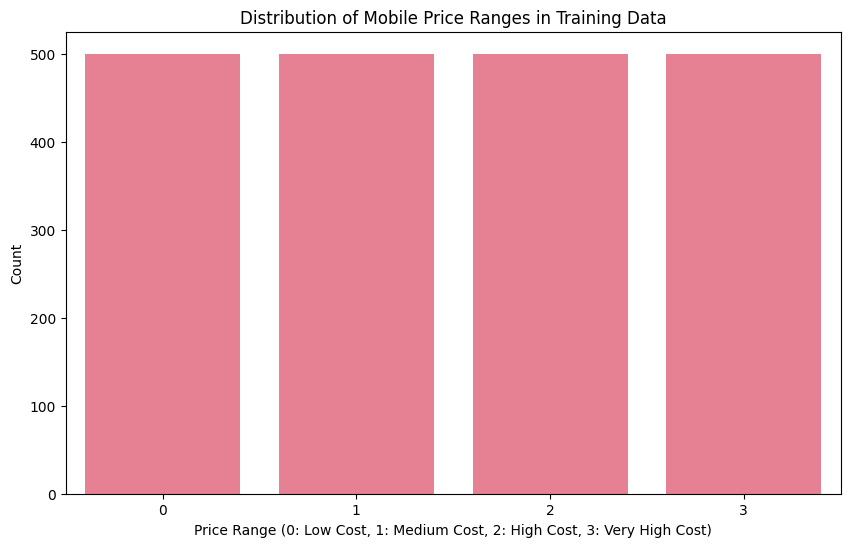

In [ ]:
# Check for missing values
print("=== Missing Values in Train Data ===")
print(train_data.isnull().sum())

print("\n=== Missing Values in Test Data ===")
print(test_data.isnull().sum())

# Check the distribution of the target variable in train data
print("\n=== Target Variable Distribution in Train Data ===")
print(train_data['price_range'].value_counts().sort_index())

# Visualize the target variable distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=train_data, x='price_range')
plt.title('Distribution of Mobile Price Ranges in Training Data')
plt.xlabel('Price Range (0: Low Cost, 1: Medium Cost, 2: High Cost, 3: Very High Cost)')
plt.ylabel('Count')
plt.show()

In [ ]:
# Prepare features and target for train data
train_ids = train_data['id'] if 'id' in train_data.columns else None
test_ids = test_data['id'] if 'id' in test_data.columns else None


X_train = train_data.drop(['price_range', 'id'], axis=1, errors='ignore')
y_train = train_data['price_range']

# Prepare test data - remove 'id' column
X_test = test_data.drop('id', axis=1, errors='ignore')

print("Training feature matrix shape:", X_train.shape)
print("Training target variable shape:", y_train.shape)
print("Testing feature matrix shape:", X_test.shape)

# Ensure both datasets have the same columns in the same order
X_test = X_test[X_train.columns]

print("\nFeatures used for modeling:")
print(X_train.columns.tolist())

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Feature scaling completed successfully!")

Training feature matrix shape: (2000, 20)
Training target variable shape: (2000,)
Testing feature matrix shape: (1000, 20)

Features used for modeling:
['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi']
Feature scaling completed successfully!


In [ ]:
#  split train data for evaluation
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
)

print(f"Training split: {X_train_split.shape[0]} samples")
print(f"Validation split: {X_val_split.shape[0]} samples")

# Scale the split data
scaler_split = StandardScaler()
X_train_split_scaled = scaler_split.fit_transform(X_train_split)
X_val_split_scaled = scaler_split.transform(X_val_split)

print("Validation data scaling completed!")

# Create and train the logistic regression model
print("\nTraining Logistic Regression model...")
log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)
log_reg.fit(X_train_split_scaled, y_train_split)

print("Model training completed!")

# Make predictions on validation set
y_val_pred = log_reg.predict(X_val_split_scaled)
y_val_pred_proba = log_reg.predict_proba(X_val_split_scaled)

print("Validation predictions generated!")

Training split: 1600 samples
Validation split: 400 samples
Validation data scaling completed!

Training Logistic Regression model...
Model training completed!
Validation predictions generated!


Validation Accuracy: 0.9650 (96.50%)

=== Classification Report ===
                    precision    recall  f1-score   support

      Low Cost (0)       0.99      0.98      0.98       100
   Medium Cost (1)       0.96      0.96      0.96       100
     High Cost (2)       0.95      0.94      0.94       100
Very High Cost (3)       0.96      0.98      0.97       100

          accuracy                           0.96       400
         macro avg       0.97      0.96      0.96       400
      weighted avg       0.97      0.96      0.96       400

=== Confusion Matrix ===


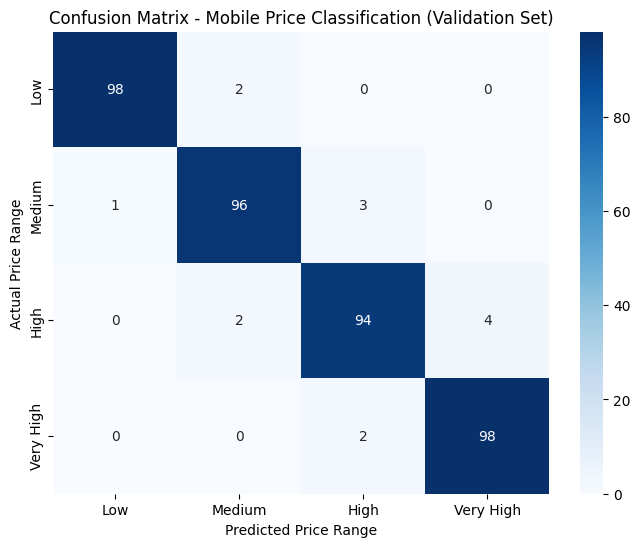

In [ ]:
# Evaluate model performance on validation set
accuracy = accuracy_score(y_val_split, y_val_pred)
print(f"Validation Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")

# Detailed classification report
print("\n=== Classification Report ===")
print(classification_report(y_val_split, y_val_pred,
                          target_names=['Low Cost (0)', 'Medium Cost (1)', 'High Cost (2)', 'Very High Cost (3)']))

# Confusion Matrix
print("=== Confusion Matrix ===")
cm = confusion_matrix(y_val_split, y_val_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low', 'Medium', 'High', 'Very High'],
            yticklabels=['Low', 'Medium', 'High', 'Very High'])
plt.title('Confusion Matrix - Mobile Price Classification (Validation Set)')
plt.xlabel('Predicted Price Range')
plt.ylabel('Actual Price Range')
plt.show()

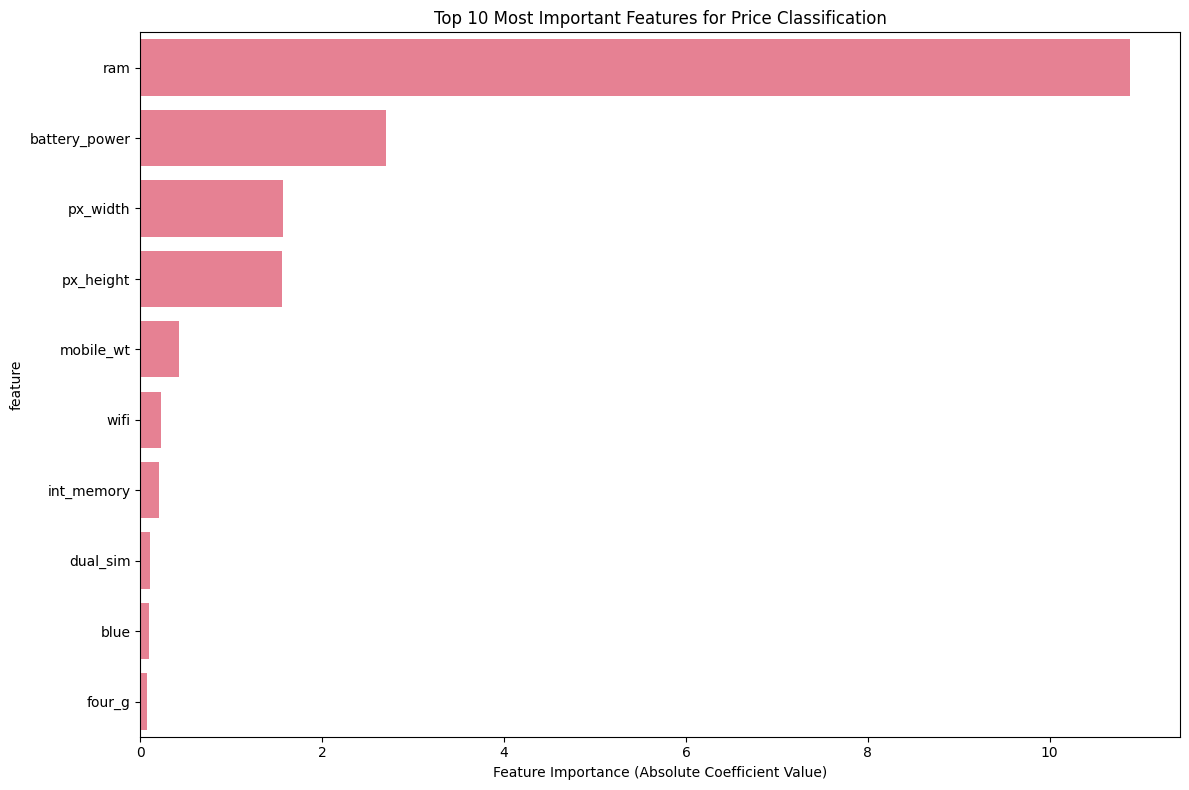


Top 10 most important features:
          feature  importance
13            ram   10.888021
0   battery_power    2.697611
12       px_width    1.568898
11      px_height    1.553335
8       mobile_wt    0.422961
19           wifi    0.231969
6      int_memory    0.201302
3        dual_sim    0.109435
1            blue    0.097516
5          four_g    0.075147


In [ ]:
# Feature Importance Analysis
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': abs(log_reg.coef_[0])  # Using coefficients from first class
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(data=feature_importance.head(10), x='importance', y='feature')
plt.title('Top 10 Most Important Features for Price Classification')
plt.xlabel('Feature Importance (Absolute Coefficient Value)')
plt.tight_layout()
plt.show()

print("\nTop 10 most important features:")
print(feature_importance.head(10))

In [ ]:
# Retrain model on full training data for final predictions
print("Retraining model on full training dataset...")
log_reg_final = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)
log_reg_final.fit(X_train_scaled, y_train)

print("Final model training completed!")

# Make predictions on actual test data
y_test_pred = log_reg_final.predict(X_test_scaled)
y_test_pred_proba = log_reg_final.predict_proba(X_test_scaled)

print("Test predictions generated!")

# Display prediction distribution
print("\n=== Test Predictions Distribution ===")
prediction_counts = pd.Series(y_test_pred).value_counts().sort_index()
for price_range, count in prediction_counts.items():
    price_labels = ['Low Cost', 'Medium Cost', 'High Cost', 'Very High Cost']
    print(f"{price_labels[price_range]}: {count} phones")

Retraining model on full training dataset...
Final model training completed!
Test predictions generated!

=== Test Predictions Distribution ===
Low Cost: 257 phones
Medium Cost: 227 phones
High Cost: 253 phones
Very High Cost: 263 phones


In [ ]:
# Create submission file
submission = pd.DataFrame({
    'id': test_ids if test_ids is not None else range(len(y_test_pred)),
    'price_range': y_test_pred
})
submission.to_csv('mobile_price_predictions.csv', index=False)
print("Predictions saved to 'mobile_price_predictions.csv'")

print("\nFirst 10 predictions:")
print(submission.head(10))

Predictions saved to 'mobile_price_predictions.csv'

First 10 predictions:
   id  price_range
0   1            3
1   2            3
2   3            2
3   4            3
4   5            1
5   6            3
6   7            3
7   8            1
8   9            3
9  10            0


In [ ]:
print(f"Dataset: Mobile Price Classification")
print(f"Train Samples: {len(train_data)}")
print(f"Test Samples: {len(test_data)}")
print(f"Validation Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"Most Important Feature: {feature_importance.iloc[0]['feature']}")
print(f"Predictions saved to: mobile_price_predictions.csv")
print("Experiment completed successfully! ")

Dataset: Mobile Price Classification
Train Samples: 2000
Test Samples: 1000
Validation Accuracy: 0.9650 (96.50%)
Most Important Feature: ram
Predictions saved to: mobile_price_predictions.csv
Experiment completed successfully! 
